# 1. 기본설정
- 코랩 드라이브 연결
- warning 금지
- max_columns 출력
- 한글 표현화를 위한 처리

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 맷플롯립을 가져온다.
import matplotlib as mpl

# 맷플롯립에서 pyplot라는 서브패키지(모듈)를 가져온다.
import matplotlib.pyplot as plt

# 넘파이를 가져온다. 
import numpy as np

# 맷플롯립에서 폰트매니저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm
# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null
# [필요하다면] 설치된 폰트 파일의 파일 이름 확인
# fm._rebuild()
# sorted([f.name 
#        for f in fm.fontManager.ttflist 
#        if f.name.startswith("Nanum")])
# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)

# 파이플롯에서 사용할 글꼴만 지정하고 싶다면 위 문장 대신 아래 문장 사용
plt.rc('font', family='NanumSquareRound') 

fm._rebuild()

# 2. 데이터 수집 및 전처리
 - 청소년 데이터

## 2.1. (번외) 데이터 수집 및 병합 처리 코드

In [ ]:
# 재은님 데이터 수집 및 병합
# post_files_joined = os.path.join('/content/gdrive/MyDrive/sbs/핵심역량프로젝트/월 별 데이터 (2018~2022)/코로나 후', "KS*.csv")
# # post_files_joined = os.path.join('/content/gdrive/MyDrive/class7/sbs/핵심역량프로젝트/월 별 데이터 (2018~2022)/코로나 전', "KS*.csv")
# post_list_files = glob.glob(post_files_joined)

# post_list_files
# post_list_files.sort()
# post_list_files

# post_df = pd.concat(map(pd.read_csv, post_list_files), ignore_index=True)

In [ ]:
# 은석님 데이터 수집 및 병합
# import os

# path = '/content/gdrive/MyDrive/class7/온반오반/data/all/'
# file_list = os.listdir(path)
# file_list_py = [file for file in file_list if file.endswith('.csv')]
# # 파일명 끝이 .csv인 경우

# df_all = pd.DataFrame()

# for i in file_list_py:
#     data = pd.read_csv(path + i)
#     df_all = pd.concat([df_all, data])
    
# df_all = df_all.sort_values(by = 'TEST_YMD',ascending=True)

# df_all.rename( columns = {
#                    'TEST_CNT': '측정회차',
#                    'CENTER_NM': '센터명',
#                    'AGE_GBN': '나이구분',
#                    'TEST_GBN': '측정구분',
#                    'TEST_AGE': '측정나이',
#                    'INPUT_GBN': '입력구분',
#                    'CERT_GBN': '상장구분',
#                    'TEST_YMD': '측정일',
#                    'TEST_SEX': '측정회원성별',
#                    'ITEM_F001': '신장',
#                    'ITEM_F002': '체중',
#                    'ITEM_F003': '체지방율',
#                    'ITEM_F004': '허리둘레',
#                    'ITEM_F005': '이완기혈압(최저)',
#                    'ITEM_F006': '수축기혈압(최고)',
#                    'ITEM_F007': '악력D',
#                    'ITEM_F008': '악력ND',
#                    'ITEM_F009': '윗몸말아올리기',
#                    'ITEM_F010': '반복점프',
#                    'ITEM_F011': '미정',
#                    'ITEM_F012': '앉아윗몸앞으로굽히기(cm)',
#                    'ITEM_F013': '일리노이',
#                    'ITEM_F014': '체공시간',
#                    'ITEM_F015': '협응력시간',
#                    'ITEM_F016': '협응력실수횟수',
#                    'ITEM_F017': '협응력계산결과값',
#                    'ITEM_F018': 'BMI',
#                    'ITEM_F019': '교차윗몸일으키기(회)',
#                    'ITEM_F020': '20m왕복오래달리기(회)',
#                    'ITEM_F021': '왕복달리기(초)',
#                    'ITEM_F022': '제자리멀리뛰기(cm)',
#                    'ITEM_F023': '의자에 앉았다일어서기',
#                    'ITEM_F024': '6분걷기',
#                    'ITEM_F025': '2분제자리걷기',
#                    'ITEM_F026': '의자에앉아 3M표적 돌아오기',
#                    'ITEM_F027': '8자보행',
#                    'ITEM_F028': '상대악력(%)',
#                    'ITEM_F029': '피두부겹합',
#                    'ITEM_F030': '왕복오래달리기(VO₂max)',
#                    'ITEM_F031': '트레드밀_안정시',
#                    'ITEM_F032': '트레드밀_3분',
#                    'ITEM_F033': '트레드밀_6분',
#                    'ITEM_F034': '트레드밀_9분',
#                    'ITEM_F035': '트레드밀(출력)',
#                    'ITEM_F036': '스텝검사_회복시 심박수',
#                    'ITEM_F037': '스텝검사(출력)',
#                    'ITEM_F038': '허벅지(좌)',
#                    'ITEM_F039': '허벅지(우)',
#                    'ITEM_F040': '반응시간(초)',
#                    'ITEM_F041': '체공시간(초)'}, inplace = True)

## 2.2. 청소년 데이터 전처리
 1. 2018.1.~2022.5.까지의 데이터를 병합한 csv 파일 불러오기
 2. 청소년에 관련된 체력측정치만 남기고 나머지는 제거
 3. 결측치가 많은 특징 제거. 
    - 윗몸말아올리기는 반복접프(회)가 대신함. 택1임.
    - 트레드밀/스텝검사는 20m왕복오래달리기(회)가 대신함.
 3. 나머지 row에 대해 결측치 제거
 4. 각 측정별 종목에 따라 이상치 제거 

In [ ]:
# 청소년 체력 데이터 불러오기
%cd '/content/gdrive/MyDrive/class7/00_온반오반 팀/핵심역량프로젝트/청소년 데이터'
!ls -al

raw_df = pd.read_csv('측정항목별 청소년데이터.csv')

/content/gdrive/.shortcut-targets-by-id/1N1s8vhguqw4WIGdcNXcBhWiF00DpHk-W/온반오반 팀/핵심역량프로젝트/청소년 데이터
total 48542
-rw------- 1 root root    27324 Aug 12 17:57  2018_2022_청소년_체력데이터.ipynb
-rw------- 1 root root 49679234 Aug 12 17:57 '측정항목별 청소년데이터.csv'


In [ ]:
'''
청소년 측정데이터
1. 심폐지구력(택1): 20m왕복오래달리기(회), 트레드밀/스텝검사
2. 근력: 상대악력(%)
3. 근지구력(택1): 윗몸말아올리기(회), 반복점프(회)
4. 유연성: 앉아윗몸앞으로굽히기(cm)
5. 민첩성: 일리노이 민첩성검사(초)
6. 순발력: 체공시간검사(초)
7. 협응력: 눈-손 협응력 검사(초)
'''

'\n청소년 측정데이터\n1. 심폐지구력(택1): 20m왕복오래달리기(회), 트레드밀/스텝검사\n2. 근력: 상대악력(%)\n3. 근지구력(택1): 윗몸말아올리기(회), 반복점프(회)\n4. 유연성: 앉아윗몸앞으로굽히기(cm)\n5. 민첩성: 일리노이 민첩성검사(초)\n6. 순발력: 체공시간검사(초)\n7. 협응력: 눈-손 협응력 검사(초)\n'

In [ ]:
raw_df.isnull().sum()

측정회차                   0
센터명                   13
나이구분                   0
측정구분                   0
연령(만)                  0
입력구분                2573
상장구분                   0
측정일                    0
성별                     0
신장                    50
체중                    69
체지방율                 189
이완기혈압(최저)             27
수축기혈압(최고)             33
윗몸말아올리기           240157
반복점프(회)           138176
앉아윗몸앞으로굽히기(cm)      1162
일리노이민첩성검사(초)       19320
체공시간검사(초)          33913
눈-손협응력검사(초)        25639
BMI                   14
20m왕복오래달리기(회)      49421
상대악력                 268
트레드밀(출력)          363345
스텝검사(출력)          341731
dtype: int64

In [ ]:
# 결측치가 많은 특징 제거. 
# 윗몸말아올리기는 반복접프(회)가 대신함. 택1임.
# 트레드밀/스텝검사는 20m왕복오래달리기(회)가 대신함.
raw_df.drop(columns=['윗몸말아올리기', '트레드밀(출력)', '스텝검사(출력)'], axis=1, inplace=True)

In [ ]:
print(len(raw_df))
raw_df.isnull().sum()

368999


측정회차                   0
센터명                   13
나이구분                   0
측정구분                   0
연령(만)                  0
입력구분                2573
상장구분                   0
측정일                    0
성별                     0
신장                    50
체중                    69
체지방율                 189
이완기혈압(최저)             27
수축기혈압(최고)             33
반복점프(회)           138176
앉아윗몸앞으로굽히기(cm)      1162
일리노이민첩성검사(초)       19320
체공시간검사(초)          33913
눈-손협응력검사(초)        25639
BMI                   14
20m왕복오래달리기(회)      49421
상대악력                 268
dtype: int64

In [ ]:
# 전체적으로 결측치 제거
train_X = raw_df.dropna().copy()
print(len(train_X))
train_X.isnull().sum()

185738


측정회차              0
센터명               0
나이구분              0
측정구분              0
연령(만)             0
입력구분              0
상장구분              0
측정일               0
성별                0
신장                0
체중                0
체지방율              0
이완기혈압(최저)         0
수축기혈압(최고)         0
반복점프(회)           0
앉아윗몸앞으로굽히기(cm)    0
일리노이민첩성검사(초)      0
체공시간검사(초)         0
눈-손협응력검사(초)       0
BMI               0
20m왕복오래달리기(회)     0
상대악력              0
dtype: int64

In [ ]:
# train_X['측정일'] = pd.to_datetime(train_X['측정일'])
# train_X['측정일'].dtype

In [ ]:
train_X.head()

,측정회차,센터명,나이구분,측정구분,연령(만),입력구분,상장구분,측정일,성별,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력
0,1,노원,청소년,일반,17.0,관리자,참가증,20180102,M,173.5,88.30,31.1,74.0,130.0,26.0,2.0,21.26,0.390,72.285,29.3,20.0,45.4
1,2,세종,청소년,일반,13.0,인바디,참가증,20180102,F,153.5,44.12,17.6,73.0,120.0,38.0,21.4,19.30,0.477,62.698,18.7,15.0,45.7
2,1,노원,청소년,일반,15.0,관리자,3등급,20180102,M,179.6,64.50,14.7,53.0,106.0,47.0,6.0,19.22,0.514,52.381,20.0,40.0,50.5
3,1,순천,청소년,일반,16.0,인바디,참가증,20180102,M,160.9,56.22,13.8,78.0,123.0,64.0,19.1,19.60,0.638,43.414,21.7,35.0,76.8
4,1,순천,청소년,일반,17.0,인바디,3등급,20180102,F,161.0,46.04,22.3,80.0,120.0,21.0,12.5,26.00,0.415,49.322,17.8,26.0,58.8


In [ ]:
# # "20m왕복오래달리기(회)", "상대악력" 결측치 제거
# train_X = train_X[(train_X["20m왕복오래달리기(회)"]).notnull() & (train_X["상대악력"]).notnull()].reset_index()

print('이상치 제거 전: ', train_X.shape)
# 이상치 제거
train_X = train_X[(train_X['20m왕복오래달리기(회)'] >= 1) & (train_X['20m왕복오래달리기(회)'] <= 120)]
print('20m왕복오래달리기(회) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['상대악력'] >= 0) & (train_X['상대악력'] <= 100)]
print('상대악력 이상치제거 후: ', train_X.shape)

train_X = train_X[(train_X['연령(만)'] >= 13) & (train_X['연령(만)'] <= 18)]
train_X['연령(만)'].value_counts()
print('연령(만) 이상치제거 후: ', train_X.shape)

train_X = train_X[(train_X['체지방율'] >= 5) & (train_X['체지방율'] <= 50)]
print('체지방율 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['이완기혈압(최저)'] >= 50) & (train_X['이완기혈압(최저)'] <= 120)]
print('이완기혈압(최저) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['수축기혈압(최고)'] >= 80) & (train_X['수축기혈압(최고)'] <= 180)]
print('수축기혈압(최고) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['BMI'] >= 10) & (train_X['BMI'] <= 50)]
print('BMI 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['20m왕복오래달리기(회)'] >= 1) & (train_X['20m왕복오래달리기(회)'] <= 120)]
print('20m왕복오래달리기(회) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['앉아윗몸앞으로굽히기(cm)'] >= -20) & (train_X['앉아윗몸앞으로굽히기(cm)'] <= 40)]
print('앉아윗몸앞으로굽히기(cm) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['일리노이민첩성검사(초)'] >= 0) & (train_X['일리노이민첩성검사(초)'] <= 60)]
print('일리노이민첩성검사(초) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['체공시간검사(초)'] >= 0) & (train_X['체공시간검사(초)'] <= 3)]
print('체공시간검사(초) 이상치제거 후: ', train_X.shape)
train_X = train_X[(train_X['반복점프(회)'] >= 0) & (train_X['반복점프(회)'] <= 80)]
print('반복점프(회) 이상치제거 후: ', train_X.shape)

train_X = train_X[(train_X['눈-손협응력검사(초)'] >= 0) & (train_X['눈-손협응력검사(초)'] <= 100)]
print('눈-손협응력검사(초) 이상치제거 후: ', train_X.shape)
# train_X = train_X[(train_X['제자리멀리뛰기(cm)'] >= 40) & (train_X['제자리멀리뛰기(cm)'] <= 340)]
# print('제자리멀리뛰기(cm) 이상치제거 후: ', train_X.shape)
# train_X = train_X[(train_X['교차윗몸일으키기(회)'] >= 0) & (train_X['교차윗몸일으키기(회)'] <= 80)]
# print('교차윗몸일으키기(회) 이상치제거 후: ', train_X.shape)
# train_X = train_X[(train_X['왕복달리기(초)'] >= 8) & (train_X['왕복달리기(초)'] <= 40)]
# print('왕복달리기(초) 이상치제거 후: ', train_X.shape)
train_X['맥압'] = train_X['수축기혈압(최고)'] - train_X['이완기혈압(최저)']
train_X.reset_index(inplace=True, drop=True)

youth_df = train_X.copy()

이상치 제거 전:  (185738, 22)
20m왕복오래달리기(회) 이상치제거 후:  (184758, 22)
상대악력 이상치제거 후:  (184660, 22)
연령(만) 이상치제거 후:  (184653, 22)
체지방율 이상치제거 후:  (183731, 22)
이완기혈압(최저) 이상치제거 후:  (182571, 22)
수축기혈압(최고) 이상치제거 후:  (182476, 22)
BMI 이상치제거 후:  (182464, 22)
20m왕복오래달리기(회) 이상치제거 후:  (182464, 22)
앉아윗몸앞으로굽히기(cm) 이상치제거 후:  (182361, 22)
일리노이민첩성검사(초) 이상치제거 후:  (182352, 22)
체공시간검사(초) 이상치제거 후:  (182324, 22)
반복점프(회) 이상치제거 후:  (182303, 22)
눈-손협응력검사(초) 이상치제거 후:  (182110, 22)


In [ ]:
youth_df.columns

Index(['측정회차', '센터명', '나이구분', '측정구분', '연령(만)', '입력구분', '상장구분', '측정일', '성별',
       '신장', '체중', '체지방율', '이완기혈압(최저)', '수축기혈압(최고)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력', '맥압'],
      dtype='object')

In [ ]:
youth_df.tail()

,측정회차,센터명,나이구분,측정구분,연령(만),입력구분,상장구분,측정일,성별,신장,체중,체지방율,이완기혈압(최저),수축기혈압(최고),반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,맥압
182105,1,KSPO아산(출장),청소년,출장,16.0,관리자,2등급,20220530,F,165.4,56.2,24.6,67.0,133.0,44.0,18.1,22.78,0.511,48.305,20.5,26.0,50.2,66.0
182106,1,KSPO아산(출장),청소년,출장,16.0,관리자,참가증,20220530,F,158.7,48.2,32.3,76.0,124.0,19.0,3.8,28.50,0.424,54.434,19.1,13.0,48.1,48.0
182107,1,광주,청소년,출장,18.0,관리자,2등급,20220530,M,174.0,72.4,20.1,71.0,120.0,48.0,22.0,18.31,0.557,58.765,23.9,63.0,68.5,49.0
182108,1,KSPO아산(출장),청소년,출장,16.0,관리자,1등급,20220530,F,161.7,47.9,20.9,52.0,93.0,42.0,26.9,20.93,0.503,65.724,18.3,51.0,56.8,41.0
182109,1,광주,청소년,출장,18.0,관리자,3등급,20220530,F,165.5,60.8,29.8,71.0,109.0,38.0,31.5,19.21,0.505,75.286,22.2,23.0,46.7,38.0


# 3. 회귀 ML 모델 만들기.
 - 일단, 사회적 거리두기 데이터를 사용하지 않은 ML을 만들자.
 - 기간은 2018.1.~2019.12.까지의 데이터를 사용하고, train과 test용으로 나누자.
 - 충분히 성능 좋은 ML을 만들기 위해 노력하자.




## 3.1. 가장 간단한 k-최근접이웃 회귀모델 사용하기

### 3.1.1. k-최근접이웃 회귀모델 - (체력측정 + 신체정보 모두 사용)
> 사용한 특징:

>need_col = ['측정일', '연령(만)', '성별', 
       '이완기혈압(최저)', '수축기혈압(최고)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력', '맥압']

> **결론:
맥압을 추가하나 안하나 모델의 성능은 비슷함.
확실히 corr에서 봐도 선형관계가 보이는 특징들이 결정에 크게 영향을 미친다.
사실상 '혈압'관련 특징은 모두 제거해도 무방하다고 본다.**

In [ ]:
youth_df.columns

Index(['측정회차', '센터명', '나이구분', '측정구분', '연령(만)', '입력구분', '상장구분', '측정일', '성별',
       '신장', '체중', '체지방율', '이완기혈압(최저)', '수축기혈압(최고)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력', '맥압'],
      dtype='object')

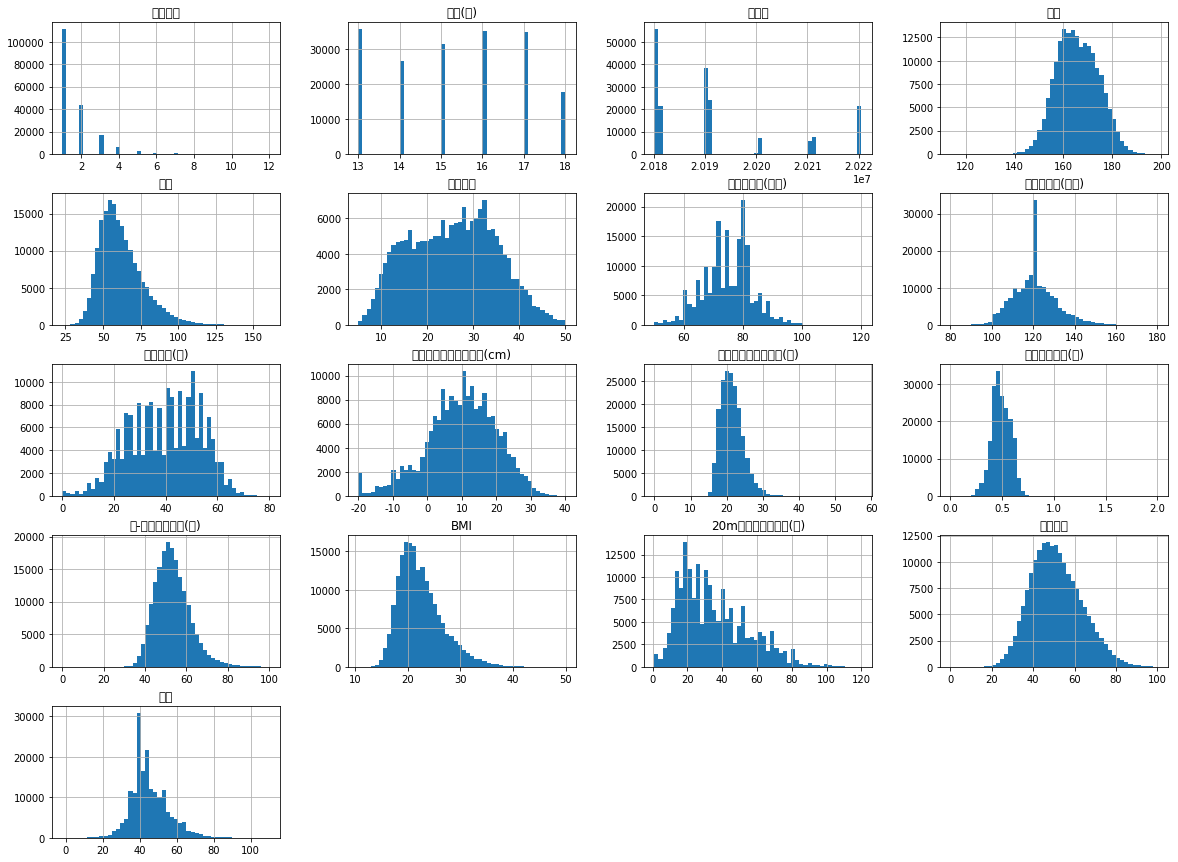

In [ ]:
youth_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
corr = youth_df.corr()
corr['20m왕복오래달리기(회)'].sort_values(ascending=False)

20m왕복오래달리기(회)     1.000000
반복점프(회)           0.622684
체공시간검사(초)         0.555787
상대악력              0.521731
신장                0.342285
맥압                0.027519
앉아윗몸앞으로굽히기(cm)    0.025869
측정회차              0.016508
수축기혈압(최고)         0.013141
연령(만)            -0.006012
이완기혈압(최저)        -0.016842
체중               -0.027909
측정일              -0.070195
BMI              -0.211373
눈-손협응력검사(초)      -0.285720
일리노이민첩성검사(초)     -0.563000
체지방율             -0.613703
Name: 20m왕복오래달리기(회), dtype: float64

In [ ]:
corr['상대악력'].sort_values(ascending=False)

상대악력              1.000000
체공시간검사(초)         0.573669
반복점프(회)           0.538556
20m왕복오래달리기(회)     0.521731
신장                0.310512
연령(만)             0.119957
측정회차              0.068665
앉아윗몸앞으로굽히기(cm)    0.035255
맥압                0.034412
측정일              -0.002874
수축기혈압(최고)        -0.007391
이완기혈압(최저)        -0.051382
체중               -0.187461
눈-손협응력검사(초)      -0.296521
BMI              -0.390708
일리노이민첩성검사(초)     -0.480220
체지방율             -0.723871
Name: 상대악력, dtype: float64

In [ ]:
corr['체지방율'].sort_values(ascending=False)

체지방율              1.000000
BMI               0.600718
일리노이민첩성검사(초)      0.511382
체중                0.333837
눈-손협응력검사(초)       0.211852
이완기혈압(최저)         0.094392
앉아윗몸앞으로굽히기(cm)    0.079219
수축기혈압(최고)         0.074416
연령(만)             0.061270
측정일               0.050089
측정회차              0.002191
맥압                0.000261
신장               -0.353238
반복점프(회)          -0.572863
체공시간검사(초)        -0.593621
20m왕복오래달리기(회)    -0.613703
상대악력             -0.723871
Name: 체지방율, dtype: float64

In [ ]:
youth_df.columns

Index(['측정회차', '센터명', '나이구분', '측정구분', '연령(만)', '입력구분', '상장구분', '측정일', '성별',
       '신장', '체중', '체지방율', '이완기혈압(최저)', '수축기혈압(최고)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력', '맥압'],
      dtype='object')

In [ ]:
need_col = ['측정일', '연령(만)', '성별', 
       '이완기혈압(최저)', '수축기혈압(최고)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력']

input_X = youth_df[need_col]
input_y = youth_df[['측정일', '체지방율']] # body fat; 체지방률

train_X = input_X[input_X['측정일'] <= 20191231]
train_y = input_y[input_y['측정일'] <= 20191231]
train_X['성별'] = train_X['성별'].replace({'M':0, 'F':1})
train_X.drop(columns=['측정일'], inplace=True)
train_y.drop(columns=['측정일'], inplace=True)
train_X.tail()

test_X = input_X[input_X['측정일'] > 20191231]
test_y = input_y[input_y['측정일'] > 20191231]
test_X['성별'] = test_X['성별'].replace({'M':0, 'F':1})
test_X.drop(columns=['측정일'], inplace=True)
test_y.drop(columns=['측정일'], inplace=True)
test_X.head()

,연령(만),성별,이완기혈압(최저),수축기혈압(최고),반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력
139894,18.0,0,83.0,123.0,52.0,11.4,17.71,0.570,46.808,20.4,21.0,59.7
139895,18.0,1,60.0,111.0,57.0,4.6,20.65,0.478,36.720,19.9,32.0,46.8
139896,18.0,0,87.0,154.0,52.0,16.7,16.28,0.601,54.745,25.2,50.0,60.2
139897,18.0,1,70.0,112.0,43.0,12.5,18.90,0.428,45.612,23.0,20.0,45.2
139898,15.0,1,77.0,136.0,32.0,26.4,19.81,0.477,49.264,22.0,18.0,56.5


In [ ]:
# 데이터 scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_train_X = pd.DataFrame(ss.fit_transform(train_X), columns=train_X.columns)
scaled_train_X.head()
scaled_test_X = pd.DataFrame(ss.transform(test_X), columns=test_X.columns)
scaled_test_X.head()

,연령(만),성별,이완기혈압(최저),수축기혈압(최고),반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력
0,1.721585,-0.918251,1.001580,0.324217,0.893271,0.174908,-1.200411,0.955059,-0.781335,-0.465075,-0.768346,0.705513
1,1.721585,1.089027,-1.797534,-0.831517,1.263498,-0.497593,-0.254654,-0.099253,-1.977598,-0.584360,-0.203204,-0.349324
2,1.721585,-0.918251,1.488382,3.309865,0.893271,0.699063,-1.660421,1.310316,0.159856,0.680065,0.721573,0.746399
3,1.721585,1.089027,-0.580528,-0.735206,0.226863,0.283695,-0.817604,-0.672248,-0.923160,0.155209,-0.819723,-0.480156
4,-0.133647,1.089027,0.271376,1.576263,-0.587635,1.658365,-0.524870,-0.110713,-0.490096,-0.083362,-0.922476,0.443848


In [ ]:
# train, val 데이터 분리
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(scaled_train_X, train_y, test_size= 0.2, random_state=42)
print(train_input.shape)
print(train_target.shape)
print(val_input.shape)
print(val_target.shape)

(111915, 12)
(111915, 1)
(27979, 12)
(27979, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(val_input, val_target))

0.8698226731487568
0.8066936789407754


In [ ]:
print(knr.score(scaled_test_X, test_y))

0.8212786148791273


---

### 3.1.2. k-최근접이웃 회귀모델 - (체력측정 + 신체데이터(1개씩만) 데이터만 )넣었을 경우
> 기본 특징: 

>need_col = ['측정일',
       '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)',
       '20m왕복오래달리기(회)', '상대악력']

> **결론**:
1. corr에 나타나는 선형관계에 따라 테스트 해 본 결과 그대로 결과에 영향을 미치는 듯 하다.
필요한 특징들만 남기고 이들을 PolynomialFeatures를 사용하여 선형모델에서의 비선형 특징을 잡아보는 게 어떨까?
2. '앉아윗몸앞으로굽히기(cm)'는 '체지방률' 예측에 큰 영향을 미치는 것 같아 빼도 상관없을 듯 하다. 

In [ ]:
youth_df.columns

Index(['측정회차', '센터명', '나이구분', '측정구분', '연령(만)', '입력구분', '상장구분', '측정일', '성별',
       '신장', '체중', '체지방율', '이완기혈압(최저)', '수축기혈압(최고)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력', '맥압'],
      dtype='object')

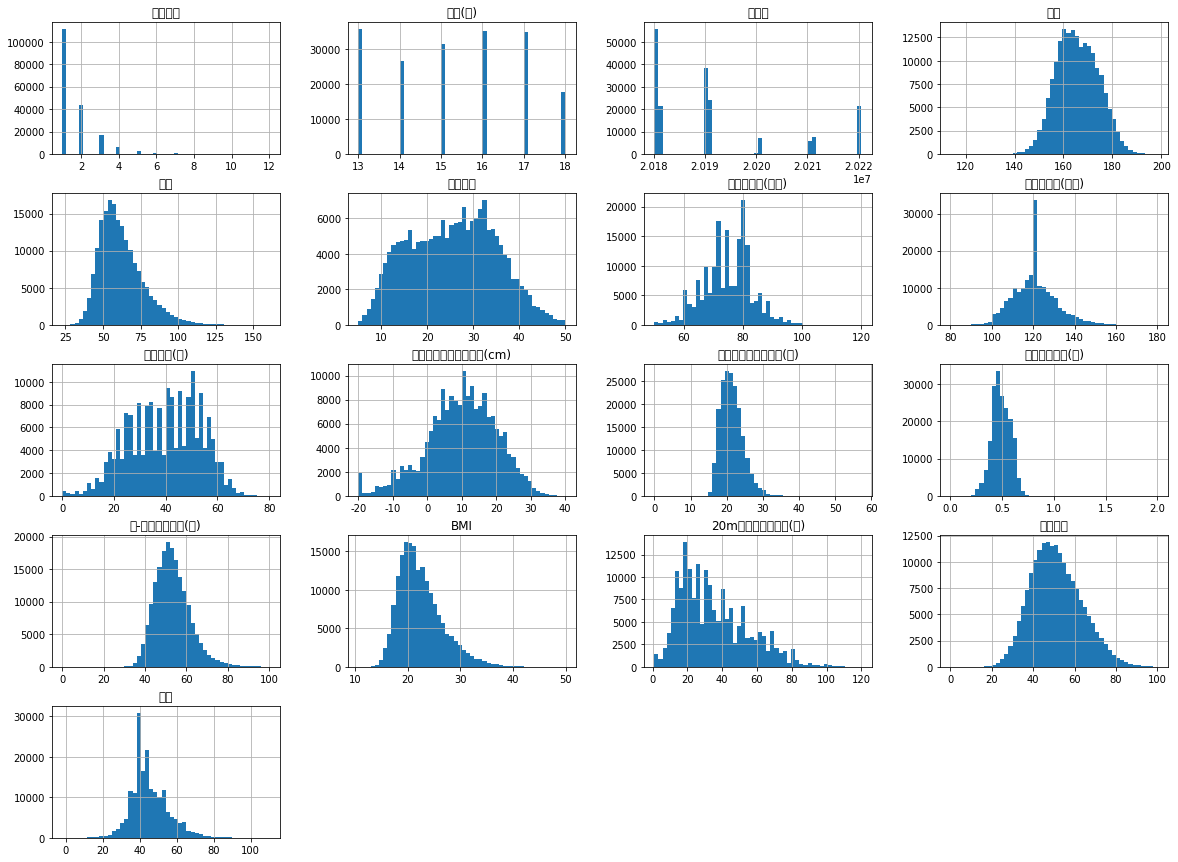

In [ ]:
youth_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
corr = youth_df.corr()
corr['20m왕복오래달리기(회)'].sort_values(ascending=False)

20m왕복오래달리기(회)     1.000000
반복점프(회)           0.622684
체공시간검사(초)         0.555787
상대악력              0.521731
신장                0.342285
맥압                0.027519
앉아윗몸앞으로굽히기(cm)    0.025869
측정회차              0.016508
수축기혈압(최고)         0.013141
연령(만)            -0.006012
이완기혈압(최저)        -0.016842
체중               -0.027909
측정일              -0.070195
BMI              -0.211373
눈-손협응력검사(초)      -0.285720
일리노이민첩성검사(초)     -0.563000
체지방율             -0.613703
Name: 20m왕복오래달리기(회), dtype: float64

In [ ]:
corr['상대악력'].sort_values(ascending=False)

상대악력              1.000000
체공시간검사(초)         0.573669
반복점프(회)           0.538556
20m왕복오래달리기(회)     0.521731
신장                0.310512
연령(만)             0.119957
측정회차              0.068665
앉아윗몸앞으로굽히기(cm)    0.035255
맥압                0.034412
측정일              -0.002874
수축기혈압(최고)        -0.007391
이완기혈압(최저)        -0.051382
체중               -0.187461
눈-손협응력검사(초)      -0.296521
BMI              -0.390708
일리노이민첩성검사(초)     -0.480220
체지방율             -0.723871
Name: 상대악력, dtype: float64

In [ ]:
corr['체지방율'].sort_values(ascending=False)

체지방율              1.000000
BMI               0.600718
일리노이민첩성검사(초)      0.511382
체중                0.333837
눈-손협응력검사(초)       0.211852
이완기혈압(최저)         0.094392
앉아윗몸앞으로굽히기(cm)    0.079219
수축기혈압(최고)         0.074416
연령(만)             0.061270
측정일               0.050089
측정회차              0.002191
맥압                0.000261
신장               -0.353238
반복점프(회)          -0.572863
체공시간검사(초)        -0.593621
20m왕복오래달리기(회)    -0.613703
상대악력             -0.723871
Name: 체지방율, dtype: float64

In [ ]:
need_col = ['측정일',
       '반복점프(회)',
       '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)',
       '20m왕복오래달리기(회)', '상대악력']

input_X = youth_df[need_col]
input_y = youth_df[['측정일', '체지방율']] # body fat; 체지방률

train_X = input_X[input_X['측정일'] <= 20191231]
train_y = input_y[input_y['측정일'] <= 20191231]
# train_X['성별'] = train_X['성별'].replace({'M':0, 'F':1})
train_X.drop(columns=['측정일'], inplace=True)
train_y.drop(columns=['측정일'], inplace=True)
train_X.tail()

test_X = input_X[input_X['측정일'] > 20191231]
test_y = input_y[input_y['측정일'] > 20191231]
# test_X['성별'] = test_X['성별'].replace({'M':0, 'F':1})
test_X.drop(columns=['측정일'], inplace=True)
test_y.drop(columns=['측정일'], inplace=True)
test_X.head()

,반복점프(회),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),20m왕복오래달리기(회),상대악력
139894,52.0,17.71,0.570,46.808,21.0,59.7
139895,57.0,20.65,0.478,36.720,32.0,46.8
139896,52.0,16.28,0.601,54.745,50.0,60.2
139897,43.0,18.90,0.428,45.612,20.0,45.2
139898,32.0,19.81,0.477,49.264,18.0,56.5


In [ ]:
# 데이터 scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_train_X = pd.DataFrame(ss.fit_transform(train_X), columns=train_X.columns)
scaled_train_X.head()
scaled_test_X = pd.DataFrame(ss.transform(test_X), columns=test_X.columns)
scaled_test_X.head()

,반복점프(회),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),20m왕복오래달리기(회),상대악력
0,0.893271,-1.200411,0.955059,-0.781335,-0.768346,0.705513
1,1.263498,-0.254654,-0.099253,-1.977598,-0.203204,-0.349324
2,0.893271,-1.660421,1.310316,0.159856,0.721573,0.746399
3,0.226863,-0.817604,-0.672248,-0.923160,-0.819723,-0.480156
4,-0.587635,-0.524870,-0.110713,-0.490096,-0.922476,0.443848


In [ ]:
new_df = pd.concat([scaled_train_X.min(axis=0), scaled_train_X.mean(axis=0), scaled_train_X.max(axis=0)], axis=1)
new_df.rename(columns={0:'min', 1:'mean', 2:'max'})

,min,mean,max
반복점프(회),-2.957086,4.368070e-17,2.966540
일리노이민첩성검사(초),-6.897468,-5.863372e-16,10.277342
체공시간검사(초),-5.577089,1.103395e-15,17.342728
눈-손협응력검사(초),-6.331956,2.663507e-16,5.521100
20m왕복오래달리기(회),-1.795877,-2.533480e-16,4.317930
상대악력,-4.176175,-4.382291e-16,4.000857


In [ ]:
# train, val 데이터 분리
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(scaled_train_X, train_y, test_size= 0.2, random_state=42)
print(train_input.shape)
print(train_target.shape)
print(val_input.shape)
print(val_target.shape)

(111915, 6)
(111915, 1)
(27979, 6)
(27979, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(val_input, val_target))

0.7116887725087109
0.5694294573188192


In [ ]:
print(knr.score(scaled_test_X, test_y))

0.6139483009492701


### 3.1.3. k-최근접이웃 회귀모델 - (신체정보 + 체력측정 + polynomial을 사용했을 때.)
> 기본 특징: 

>need_col = ['측정일',
       '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)',
       '20m왕복오래달리기(회)', '상대악력']

> **결론**:
1. corr에 나타나는 선형관계에 따라 테스트 해 본 결과 그대로 결과에 영향을 미치는 듯 하다.
필요한 특징들만 남기고 이들을 PolynomialFeatures를 사용하여 선형모델에서의 비선형 특징을 잡아보는 게 어떨까?
2. '앉아윗몸앞으로굽히기(cm)'는 '체지방률' 예측에 큰 영향을 미치는 것 같아 빼도 상관없을 듯 하다. 

In [ ]:
youth_df.columns

Index(['측정회차', '센터명', '나이구분', '측정구분', '연령(만)', '입력구분', '상장구분', '측정일', '성별',
       '신장', '체중', '체지방율', '이완기혈압(최저)', '수축기혈압(최고)', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력', '맥압'],
      dtype='object')

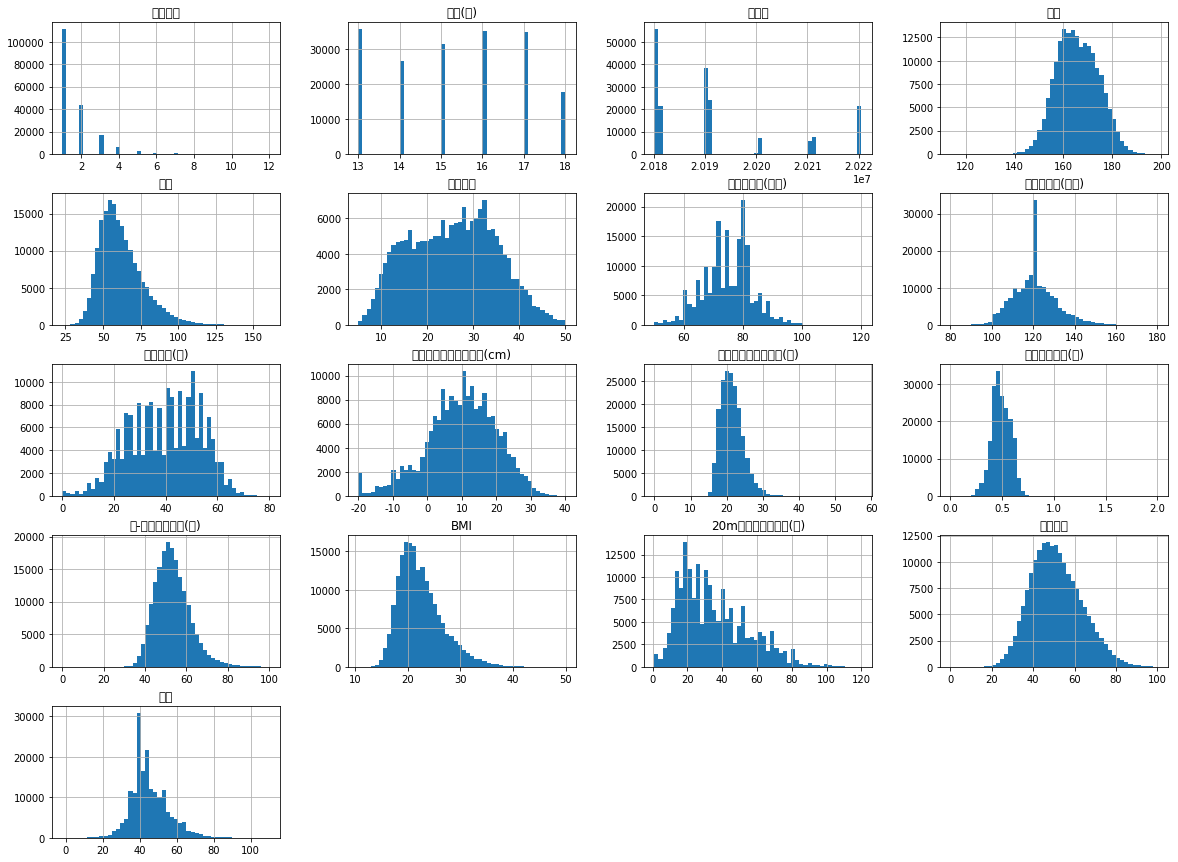

In [ ]:
youth_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
corr = youth_df.corr()
corr['20m왕복오래달리기(회)'].sort_values(ascending=False)

20m왕복오래달리기(회)     1.000000
반복점프(회)           0.622684
체공시간검사(초)         0.555787
상대악력              0.521731
신장                0.342285
맥압                0.027519
앉아윗몸앞으로굽히기(cm)    0.025869
측정회차              0.016508
수축기혈압(최고)         0.013141
연령(만)            -0.006012
이완기혈압(최저)        -0.016842
체중               -0.027909
측정일              -0.070195
BMI              -0.211373
눈-손협응력검사(초)      -0.285720
일리노이민첩성검사(초)     -0.563000
체지방율             -0.613703
Name: 20m왕복오래달리기(회), dtype: float64

In [ ]:
corr['상대악력'].sort_values(ascending=False)

상대악력              1.000000
체공시간검사(초)         0.573669
반복점프(회)           0.538556
20m왕복오래달리기(회)     0.521731
신장                0.310512
연령(만)             0.119957
측정회차              0.068665
앉아윗몸앞으로굽히기(cm)    0.035255
맥압                0.034412
측정일              -0.002874
수축기혈압(최고)        -0.007391
이완기혈압(최저)        -0.051382
체중               -0.187461
눈-손협응력검사(초)      -0.296521
BMI              -0.390708
일리노이민첩성검사(초)     -0.480220
체지방율             -0.723871
Name: 상대악력, dtype: float64

**[기본데이터]**
> need_col = ['연령(만)', '성별',
       '체지방율', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력']

In [ ]:
need_col = ['측정일', '연령(만)', '성별',
       '체지방율', '반복점프(회)',
       '앉아윗몸앞으로굽히기(cm)', '일리노이민첩성검사(초)', '체공시간검사(초)', '눈-손협응력검사(초)', 'BMI',
       '20m왕복오래달리기(회)', '상대악력']

input_X = youth_df[need_col]
input_y = youth_df[['측정일', '체지방율']] # body fat; 체지방률

train_X = input_X[input_X['측정일'] <= 20191231]
train_y = input_y[input_y['측정일'] <= 20191231]
train_X['성별'] = train_X['성별'].replace({'M':0, 'F':1})
train_X.drop(columns=['측정일'], inplace=True)
train_y.drop(columns=['측정일'], inplace=True)
train_X.tail()

test_X = input_X[input_X['측정일'] > 20191231]
test_y = input_y[input_y['측정일'] > 20191231]
test_X['성별'] = test_X['성별'].replace({'M':0, 'F':1})
test_X.drop(columns=['측정일'], inplace=True)
test_y.drop(columns=['측정일'], inplace=True)
test_X.head()

,연령(만),성별,체지방율,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력
139894,18.0,0,18.5,52.0,11.4,17.71,0.570,46.808,20.4,21.0,59.7
139895,18.0,1,26.2,57.0,4.6,20.65,0.478,36.720,19.9,32.0,46.8
139896,18.0,0,19.3,52.0,16.7,16.28,0.601,54.745,25.2,50.0,60.2
139897,18.0,1,33.1,43.0,12.5,18.90,0.428,45.612,23.0,20.0,45.2
139898,15.0,1,29.4,32.0,26.4,19.81,0.477,49.264,22.0,18.0,56.5


In [ ]:
# 데이터 polynomailfeatures & scaling
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(train_X)
# pf.get_feature_names_out(input_features=train_X.columns)
# pf.get_feature_names_out(input_features=test_X.columns)
dummy_train_X = pd.DataFrame(pf.fit_transform(train_X), columns=pf.get_feature_names_out(input_features=train_X.columns))
dummy_test_X = pd.DataFrame(pf.fit_transform(test_X), columns=pf.get_feature_names_out(input_features=test_X.columns))


ss = StandardScaler()
scaled_train_X = pd.DataFrame(ss.fit_transform(dummy_train_X), columns=dummy_train_X.columns)
scaled_train_X.head()
scaled_test_X = pd.DataFrame(ss.transform(dummy_test_X), columns=dummy_test_X.columns)
scaled_test_X.head()

,연령(만),성별,체지방율,반복점프(회),앉아윗몸앞으로굽히기(cm),일리노이민첩성검사(초),체공시간검사(초),눈-손협응력검사(초),BMI,20m왕복오래달리기(회),상대악력,연령(만)^2,연령(만) 성별,연령(만) 체지방율,연령(만) 반복점프(회),연령(만) 앉아윗몸앞으로굽히기(cm),연령(만) 일리노이민첩성검사(초),연령(만) 체공시간검사(초),연령(만) 눈-손협응력검사(초),연령(만) BMI,연령(만) 20m왕복오래달리기(회),연령(만) 상대악력,성별^2,성별 체지방율,성별 반복점프(회),성별 앉아윗몸앞으로굽히기(cm),성별 일리노이민첩성검사(초),성별 체공시간검사(초),성별 눈-손협응력검사(초),성별 BMI,성별 20m왕복오래달리기(회),성별 상대악력,체지방율^2,체지방율 반복점프(회),체지방율 앉아윗몸앞으로굽히기(cm),체지방율 일리노이민첩성검사(초),체지방율 체공시간검사(초),체지방율 눈-손협응력검사(초),체지방율 BMI,체지방율 20m왕복오래달리기(회),체지방율 상대악력,반복점프(회)^2,반복점프(회) 앉아윗몸앞으로굽히기(cm),반복점프(회) 일리노이민첩성검사(초),반복점프(회) 체공시간검사(초),반복점프(회) 눈-손협응력검사(초),반복점프(회) BMI,반복점프(회) 20m왕복오래달리기(회),반복점프(회) 상대악력,앉아윗몸앞으로굽히기(cm)^2,앉아윗몸앞으로굽히기(cm) 일리노이민첩성검사(초),앉아윗몸앞으로굽히기(cm) 체공시간검사(초),앉아윗몸앞으로굽히기(cm) 눈-손협응력검사(초),앉아윗몸앞으로굽히기(cm) BMI,앉아윗몸앞으로굽히기(cm) 20m왕복오래달리기(회),앉아윗몸앞으로굽히기(cm) 상대악력,일리노이민첩성검사(초)^2,일리노이민첩성검사(초) 체공시간검사(초),일리노이민첩성검사(초) 눈-손협응력검사(초),일리노이민첩성검사(초) BMI,일리노이민첩성검사(초) 20m왕복오래달리기(회),일리노이민첩성검사(초) 상대악력,체공시간검사(초)^2,체공시간검사(초) 눈-손협응력검사(초),체공시간검사(초) BMI,체공시간검사(초) 20m왕복오래달리기(회),체공시간검사(초) 상대악력,눈-손협응력검사(초)^2,눈-손협응력검사(초) BMI,눈-손협응력검사(초) 20m왕복오래달리기(회),눈-손협응력검사(초) 상대악력,BMI^2,BMI 20m왕복오래달리기(회),BMI 상대악력,20m왕복오래달리기(회)^2,20m왕복오래달리기(회) 상대악력,상대악력^2
0,1.721585,-0.918251,-0.731009,0.893271,0.174908,-1.200411,0.955059,-0.781335,-0.465075,-0.768346,0.705513,1.818640,-0.909055,-0.353617,1.474233,0.359060,-0.125425,1.718468,0.254680,0.333134,-0.555139,1.382646,-0.918251,-0.879371,-0.831936,-0.632404,-0.906353,-0.902536,-0.899802,-0.893814,-0.775884,-0.886140,-0.794145,0.059668,-0.142353,-0.910487,-0.348966,-0.855175,-0.701440,-1.148773,-0.318547,0.875767,0.470497,0.397123,1.015062,0.518927,0.534594,-0.412727,0.926370,-0.305940,-0.019444,0.365930,0.047614,0.075266,-0.250490,0.343951,-1.085762,-0.117635,-1.098339,-0.983110,-1.040323,-0.085739,0.925940,0.205848,0.295418,-0.532764,0.895911,-0.763151,-0.818657,-0.911777,0.146794,-0.488093,-0.852289,0.367590,-0.702982,-0.516287,0.610050
1,1.721585,1.089027,0.091622,1.263498,-0.497593,-0.254654,-0.099253,-1.977598,-0.584360,-0.203204,-0.349324,1.818640,1.428291,0.557124,1.880027,-0.415235,0.779077,0.714956,-1.110544,0.218129,0.097326,0.295446,1.089027,0.744966,2.447847,-0.132656,0.852618,1.307681,0.396832,0.882683,1.383464,1.126595,-0.088943,1.554369,-0.449138,-0.067790,0.182496,-0.691857,-0.227158,0.106600,0.039496,1.390806,-0.285440,1.497589,0.757388,0.008726,0.758839,0.182886,0.512127,-0.817667,-0.497390,-0.493505,-0.618006,-0.536271,-0.460454,-0.519069,-0.299627,-0.269085,-1.336589,-0.573229,-0.216898,-0.479404,-0.183806,-1.701726,-0.500620,-0.259630,-0.324793,-1.642411,-1.593081,-0.715091,-1.474430,-0.585560,-0.354839,-0.721461,-0.369950,-0.337907,-0.429563
2,1.721585,-0.918251,-0.645541,0.893271,0.699063,-1.660421,1.310316,0.159856,0.680065,0.721573,0.746399,1.818640,-0.909055,-0.258995,1.474233,0.962554,-0.565369,2.056607,1.328806,1.437175,1.164996,1.424785,-0.918251,-0.879371,-0.831936,-0.632404,-0.906353,-0.902536,-0.899802,-0.893814,-0.775884,-0.886140,-0.732187,0.176679,0.235817,-0.963526,-0.065776,-0.531260,-0.342517,0.459857,-0.149660,0.875767,1.100673,0.077634,1.188566,1.136484,1.296112,0.814301,0.951028,0.394533,0.293432,1.073336,0.742310,0.891748,1.105849,0.946302,-1.424574,-0.327515,-0.888472,-0.578835,0.219769,-0.420328,1.343763,1.505897,1.618711,0.951983,1.121151,0.077913,0.648587,0.884645,0.902017,0.570649,1.132737,1.504526,0.473197,0.768204,0.655415
3,1.721585,1.089027,0.828785,0.226863,0.283695,-0.817604,-0.672248,-0.923160,0.155209,-0.819723,-0.480156,1.818640,1.428291,1.373243,0.743803,0.484314,0.240683,0.169570,0.092823,0.931156,-0.614454,0.160599,1.089027,1.172750,1.642286,0.725606,0.703553,1.076487,0.710820,1.159423,0.573708,1.057784,0.749395,1.357194,0.546201,0.266137,0.623867,0.238769,0.563157,-0.385616,0.833655,0.067769,0.344050,-0.067846,-0.194302,-0.188372,0.315536,-0.601501,-0.174486,-0.182288,0.134155,0.136438,0.114302,0.313515,-0.226351,0.129578,-0.782081,-1.473583,-0.986809,-0.377044,-1.022964,-0.965230,-0.705207,-1.290099,-0.375785,-0.812797,-0.641502,-0.87

In [ ]:
new_df = pd.concat([scaled_train_X.min(axis=0), scaled_train_X.mean(axis=0), scaled_train_X.max(axis=0)], axis=1)
new_df.rename(columns={0:'min', 1:'mean', 2:'max'})

,min,mean,max
연령(만),-1.370468,4.078823e-15,1.721585
성별,-0.918251,-2.709974e-14,1.089027
체지방율,-2.173285,-1.215500e-14,2.634300
반복점프(회),-2.957086,-2.208847e-15,2.966540
앉아윗몸앞으로굽히기(cm),-2.930462,-1.146096e-14,3.003366
...,...,...,...
BMI 20m왕복오래달리기(회),-1.844563,-2.928745e-14,7.732304
BMI 상대악력,-4.260875,3.162421e-14,5.472857
20m왕복오래달리기(회)^2,-0.954327,1.505452e-15,7.270930
20m왕복오래달리기(회) 상대악력,-1.433195,5.086722e-15,6.306296


In [ ]:
# train, val 데이터 분리
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(scaled_train_X, train_y, test_size= 0.2, random_state=42)
print(train_input.shape)
print(train_target.shape)
print(val_input.shape)
print(val_target.shape)

(111915, 77)
(111915, 1)
(27979, 77)
(27979, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

pred_train_y = knr.predict(train_input)
pred_val_y = knr.predict(val_input)
pred_test_y = knr.predict(scaled_test_X)
# print(knr.score(train_input, train_target))
# print(knr.score(val_input, val_target))
# print(knr.score(scaled_test_X, test_y))

train_MAE = mean_absolute_error(train_target, pred_train_y)
train_MSE = mean_squared_error(train_target, pred_train_y)
train_RMSE = np.sqrt(mean_squared_error(train_target, pred_train_y))
train_R2 = r2_score(train_target, pred_train_y)

val_MAE = mean_absolute_error(val_target, pred_val_y)
val_MSE = mean_squared_error(val_target, pred_val_y)
val_RMSE = np.sqrt(mean_squared_error(val_target, pred_val_y))
val_R2 = r2_score(val_target, pred_val_y)

test_MAE = mean_absolute_error(test_y, pred_test_y)
test_MSE = mean_squared_error(test_y, pred_test_y)
test_RMSE = np.sqrt(mean_squared_error(test_y, pred_test_y))
test_R2 = r2_score(test_y, pred_test_y)


In [ ]:
pd.DataFrame([[train_MAE, train_MSE, train_RMSE, train_R2],
              [val_MAE, val_MSE, val_RMSE, val_R2],
              [test_MAE, test_MSE, test_RMSE, test_R2]], 
             index=['Train', 'Validation', 'Test'], columns=['MAE', 'MSE', 'RMSE', 'R2'])

,MAE,MSE,RMSE,R2
Train,0.920926,1.461396,1.208882,0.983313
Validation,1.114061,2.154278,1.467746,0.975453
Test,1.155282,2.296739,1.515500,0.974771


In [ ]:
print('훈련데이터 갯수: ', len(pred_train_y))
print('검증데이터 갯수: ', len(pred_val_y))
print('테스트데이터 갯수: ', len(pred_test_y))
print(np.min(pred_train_y), np.max(pred_train_y))

훈련데이터 갯수:  111915
검증데이터 갯수:  27979
테스트데이터 갯수:  42216
5.9 49.50000000000001


---